In [11]:
# Import dependencies
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Import Data
main_file_path = '../data/data_abalone.csv'
data = pd.read_csv(main_file_path)

print('Number of Samples: ', data.shape[0])
print('Number of Attributes: ', data.shape[1]-1)
data.head()

Number of Samples:  4177
Number of Attributes:  8


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Data Preprocessing

In [13]:
#Display Data types of each column
data.dtypes
data.rings.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: rings, dtype: float64

In [15]:
# Variable TotalCharges should be a continuous numeric data type rather than a discrete object data type
df = data.copy()
df.loc[df['rings'] <= 10, 'rings'] = 0
df.loc[df['rings'] > 10, 'rings'] = 1
df.head()

# Check for NULL entries
data.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [17]:
# Indicies of each class' observations
i_class0 = np.where(df.rings == 1)[0]
i_class1 = np.where(df.rings == 0)[0]

# Number of observations in each class
n0 = len(i_class0)
n1 = len(i_class1)

print("If choose 0 for all guesses: ", n1/data.shape[0])


# Separate X and Y
ydata = df.rings
xdata_raw = df.drop(['rings'], axis=1) 


# Convert all categorial variables in xdata into dummy variables
xdata = pd.get_dummies(xdata_raw)

xdata.head()

If choose 0 for all guesses:  0.6535791237730428


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [18]:
#Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.2, random_state=101)

In [19]:
# Scale all features from 0 to 1
from sklearn.preprocessing import MinMaxScaler

features = X_train.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_train.columns = features
X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = features

X_train.head()


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,0.695946,0.680672,0.300971,0.340490,0.219233,0.257615,0.332337,0.0,0.0,1.0
1,0.324324,0.319328,0.165049,0.053296,0.034970,0.081810,0.048331,0.0,1.0,0.0
2,0.560811,0.563025,0.262136,0.222222,0.162071,0.166232,0.181365,0.0,0.0,1.0
3,0.000000,0.000000,0.019417,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0
4,0.750000,0.714286,0.320388,0.474388,0.369536,0.481288,0.385650,1.0,0.0,0.0


### Predictive Models - Parameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

def grid_search(estimator, param_grid, X_train, y_train):
    grid = GridSearchCV(estimator, param_grid, cv=10, scoring='accuracy', return_train_score=True, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']])

    print()
    # examine the best model
    print('Best_score = ', grid.best_score_)
    print('Best_params = ', grid.best_params_)
    return grid

##### **Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier

param_grid={
             'criterion': ["gini", "entropy"],
             'max_depth': list(range(1,20,2)),
           }

dtree_grid = grid_search(DecisionTreeClassifier(), param_grid, X_train, y_train)


    mean_test_score  std_test_score                                     params
0          0.713260        0.023873      {'max_depth': 1, 'criterion': 'gini'}
1          0.748878        0.015922      {'max_depth': 3, 'criterion': 'gini'}
2          0.751871        0.019638      {'max_depth': 5, 'criterion': 'gini'}
3          0.744388        0.014624      {'max_depth': 7, 'criterion': 'gini'}
4          0.732715        0.025741      {'max_depth': 9, 'criterion': 'gini'}
5          0.717151        0.035321     {'max_depth': 11, 'criterion': 'gini'}
6          0.712960        0.036380     {'max_depth': 13, 'criterion': 'gini'}
7          0.704579        0.032565     {'max_depth': 15, 'criterion': 'gini'}
8          0.707273        0.028840     {'max_depth': 17, 'criterion': 'gini'}
9          0.707273        0.034776     {'max_depth': 19, 'criterion': 'gini'}
10         0.689315        0.031977   {'max_depth': 1, 'criterion': 'entropy'}
11         0.739300        0.016204   {'max_depth': 

##### **Nerual Network**

In [ ]:
from sklearn.neural_network import MLPClassifier

param_grid = {
               'solver': ['lbfgs'],
               'max_iter': [500,1000,1500],
               'alpha': [1.0,2.0],
               'hidden_layer_sizes':np.arange(2, 6), 
               'random_state':[0,2,4,6,8]
             }

nn_grid = grid_search(MLPClassifier(random_state=0), param_grid, X_train, y_train)


##### **Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
               'loss': ['deviance', 'exponential'],    
               'learning_rate': [0.05, 0.1, 0.2],
               'max_depth': list(range(2,20,2)),
               'n_estimators': [20,40,80]
             }

gb_grid = grid_search(GradientBoostingClassifier(random_state = 0), param_grid, X_train, y_train)
 

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


##### **Support Vector Machine**

In [32]:
from sklearn.svm import SVC

param_grid = [
               {
                 'C': [1, 10, 100, 1000], 
                 'kernel': ['linear']
               },
               {
                 'C': [1, 10, 100, 1000], 
                 'gamma': [0.001, 0.0001], 
                 'kernel': ['rbf']
               },
             ]

svc_grid = grid_search(SVC(), param_grid, X_train, y_train)

    mean_test_score  std_test_score  \
0          0.766836        0.022481   
1          0.775816        0.025038   
2          0.779707        0.021098   
3          0.780605        0.019555   
4          0.646812        0.000317   
5          0.646812        0.000317   
6          0.709967        0.022924   
7          0.646812        0.000317   
8          0.740796        0.027285   
9          0.709967        0.022924   
10         0.769231        0.023621   
11         0.741095        0.027450   

                                           params  
0                    {'kernel': 'linear', 'C': 1}  
1                   {'kernel': 'linear', 'C': 10}  
2                  {'kernel': 'linear', 'C': 100}  
3                 {'kernel': 'linear', 'C': 1000}  
4       {'kernel': 'rbf', 'gamma': 0.001, 'C': 1}  
5      {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1}  
6      {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}  
7     {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}  
8     {'kernel': 'rbf', 

##### **K Nearest Neighbors**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
               'n_neighbors': list(range(1, 31)),    
               'weights': ['uniform', 'distance']
             }

knn_grid = grid_search(KNeighborsClassifier(), param_grid, X_train, y_train)

    mean_test_score  std_test_score  \
0          0.711464        0.027860   
1          0.711464        0.027860   
2          0.729123        0.018765   
3          0.711464        0.027860   
4          0.749776        0.026906   
5          0.747980        0.026386   
6          0.748878        0.017168   
7          0.745884        0.019467   
8          0.760251        0.019631   
9          0.758456        0.020026   
10         0.759353        0.016978   
11         0.759653        0.014537   
12         0.765040        0.015378   
13         0.763843        0.016907   
14         0.769829        0.017949   
15         0.761449        0.014982   
16         0.771625        0.017336   
17         0.769231        0.017194   
18         0.761748        0.021374   
19         0.767435        0.019122   
20         0.768034        0.021863   
21         0.768632        0.019707   
22         0.764142        0.020116   
23         0.766836        0.022231   
24         0.767136      

### Predictive Models - Learning Curves

In [24]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

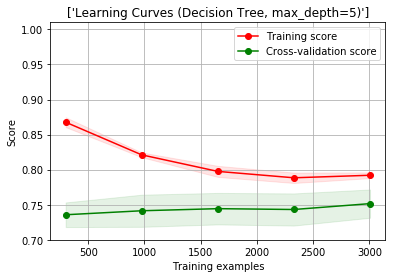

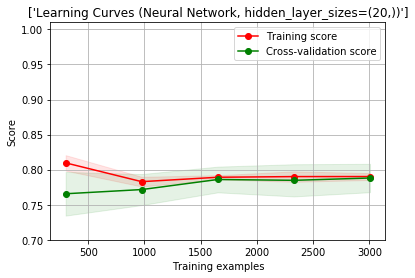

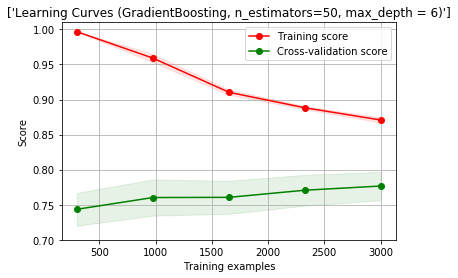

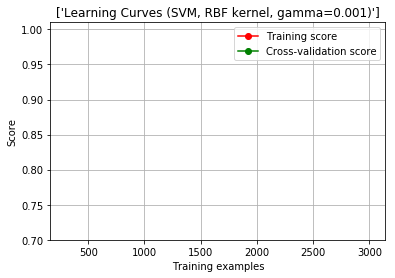

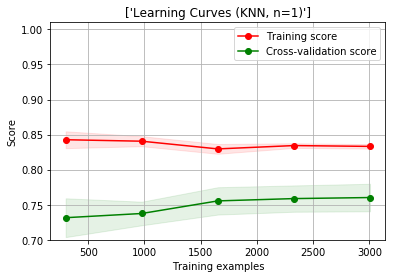

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

titles = []
estimators = []

#Decision Tree
titles.append(["Learning Curves (Decision Tree, max_depth=5)"])
estimators.append(DecisionTreeClassifier(max_depth=5))

#Nueral Network
titles.append(["Learning Curves (Neural Network, hidden_layer_sizes=(20,))"])
estimators.append(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20,), random_state=1))

#Boosting
titles.append(["Learning Curves (GradientBoosting, n_estimators=50, max_depth = 6)"])
estimators.append(GradientBoostingClassifier(n_estimators=50, max_depth = 5, random_state = 0))

#SVM
titles.append(["Learning Curves (SVM, RBF kernel, gamma=0.001)"])
estimators.append(SVC(gamma=0.001))

#KNN
titles.append(["Learning Curves (KNN, n=1)"])
estimators.append(KNeighborsClassifier(n_neighbors=5))
i = 0


for estimator in estimators:
    plot_learning_curve(estimator, titles[i], X_train, y_train, (0.7,1.01), cv=10, n_jobs=-1)
    i +=1
plt.show()

In [68]:
# Import Scoring Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

#Create num_train_samples to use in learning curve
percentages = np.linspace(.001,1.0,199, endpoint=True)
num_train_samples = [int(i*len(X_train)) for i in percentages]


#### - Decision Tree
Learning curve: # Train samples
Complexity curve: Max_depth

Text(0,0.5,'Cross-Validated Accuracy')

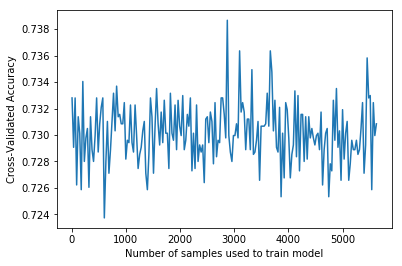

In [69]:
from sklearn.tree import DecisionTreeClassifier  
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dtree_scores = []
for x in num_train_samples:   
    dtree = DecisionTreeClassifier(max_depth=None) 
    scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
    dtree_scores.append(scores.mean())

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(num_train_samples, dtree_scores)
plt.xlabel('Number of samples used to train model')
plt.ylabel('Cross-Validated Accuracy')

In [70]:


def decision_tree(X_train, X_test, y_train, y_test, max_depth=None):
    dtree = DecisionTreeClassifier(max_depth=max_depth)  
    #print(dtree)
    
    start_time = timeit.default_timer()
    dtree.fit(X_train, y_train) 
    fit_time = timeit.default_timer() - start_time
    
    start_time1 = timeit.default_timer()
    y_pred = dtree.predict(X_test)
    pred_time = timeit.default_timer() - start_time1
    
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, fit_time, pred_time

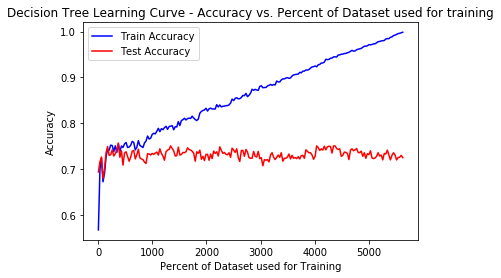

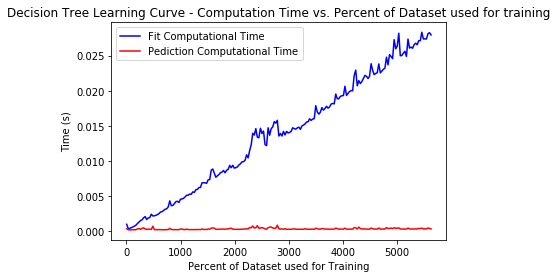

In [71]:
# Learning curve based off of number of Samples in training set
train_results, test_results, fit_time_results, pred_time_results= [],[],[],[]

for x in num_train_samples:
    test_accuracy, test_fit_time, test_pred_time = decision_tree(X_train[:x], X_test, y_train[:x], y_test)
    test_results.append(test_accuracy)
    fit_time_results.append(test_fit_time)
    pred_time_results.append(test_pred_time)
    
    train_accuracy, train_fit_time, train_pred_time = decision_tree(X_train[:x], X_train, y_train[:x], y_train)
    train_results.append(train_accuracy)

plt.figure(0)
line1, = plt.plot(num_train_samples, train_results, 'b')
line2, = plt.plot(num_train_samples, test_results, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Percent of Dataset used for Training')
plt.title('Decision Tree Learning Curve - Accuracy vs. Percent of Dataset used for training')
plt.legend(["Train Accuracy","Test Accuracy"])
plt.show()

plt.figure(1)
plt.plot(num_train_samples, fit_time_results, 'b')
plt.plot(num_train_samples, pred_time_results, 'r')
plt.ylabel('Time (s)')
plt.xlabel('Percent of Dataset used for Training')
plt.title('Decision Tree Learning Curve - Computation Time vs. Percent of Dataset used for training')
plt.legend(["Fit Computational Time", "Pediction Computational Time"])
plt.show()

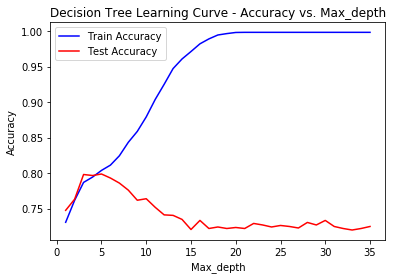

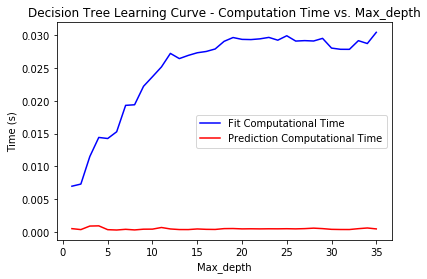

In [72]:
# Learning curve based off of number of Samples in training set
depths = np.linspace(1, 35, 35, endpoint=True)
train_results, test_results, fit_time_results, pred_time_results= [],[],[],[]

for depth in depths:
    test_accuracy, test_fit_time, test_pred_time = decision_tree(X_train, X_test, y_train, y_test, max_depth=depth)
    test_results.append(test_accuracy)
    fit_time_results.append(test_fit_time)
    pred_time_results.append(test_pred_time)
    
    train_accuracy, train_fit_time, train_pred_time = decision_tree(X_train, X_train, y_train, y_train, max_depth=depth)
    train_results.append(train_accuracy)

plt.figure(0)
plt.plot(depths, train_results, 'b')
plt.plot(depths, test_results, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.title('Decision Tree Learning Curve - Accuracy vs. Max_depth')
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.show()

plt.figure(1)
plt.plot(depths, fit_time_results, 'b', label="Fit Computational Time")
plt.plot(depths, pred_time_results, 'r', label="Prediction Computational Time")
plt.ylabel('Time (s)')
plt.xlabel('Max_depth')
plt.title('Decision Tree Learning Curve - Computation Time vs. Max_depth')
plt.legend(["Fit Computational Time", "Prediction Computational Time"])
plt.show()

In [12]:
def decision_tree_auc(X_train, X_test, y_train, y_test, max_depth):
    dtree = DecisionTreeClassifier(max_depth=max_depth)  
    dtree.fit(X_train, y_train) 
    y_pred = dtree.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return roc_auc

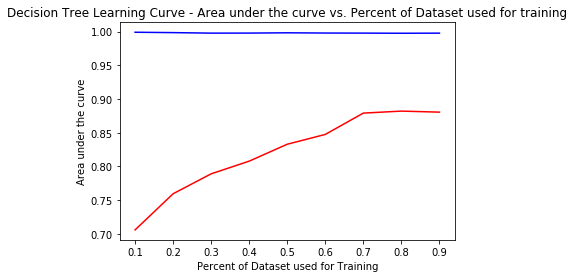

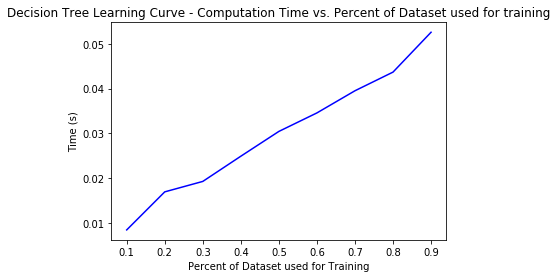

In [13]:
# Learning curve based off of number of Samples in training set
test_percentages = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
train_percentages = [.9,.8,.7,.6,.5,.4,.3,.2,.1]
train_results = []
test_results = []
time_results = []
for percent in test_percentages:
    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=percent, random_state=101)
    start_time = timeit.default_timer()
    test_acc = decision_tree_auc(X_train, X_test, y_train, y_test, max_depth=35)
    time_results.append(timeit.default_timer() - start_time)
    test_results.append(test_acc)
    train_results.append(decision_tree_auc(X_train, X_train, y_train, y_train, max_depth=35))

plt.figure(0)
line1, = plt.plot(train_percentages, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(train_percentages, test_results, 'r', label="Test Accuracy")
plt.ylabel('Area under the curve')
plt.xlabel('Percent of Dataset used for Training')
plt.title('Decision Tree Learning Curve - Area under the curve vs. Percent of Dataset used for training')
plt.show()

plt.figure()
plt.plot(train_percentages, time_results, 'b', label="Train Accuracy")
plt.ylabel('Time (s)')
plt.xlabel('Percent of Dataset used for Training')
plt.title('Decision Tree Learning Curve - Computation Time vs. Percent of Dataset used for training')
plt.show()

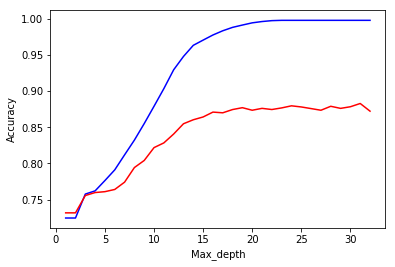

In [14]:
# Learning curve based off of number of Samples in training set
depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
train_auc_results = []
test_auc_results = []
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.3, random_state=101)
for depth in depths:
    start_time = timeit.default_timer()
    test_acc = decision_tree(X_train, X_test, y_train, y_test, max_depth=depth)
    elapsed = timeit.default_timer() - start_time
    #print('This "{name}" took {time} seconds to complete.'.format(name='decision tree', time=elapsed))
    test_results.append(test_acc)
    test_auc_results.append(decision_tree_auc(X_train, X_test, y_train, y_test, max_depth=depth))
    
    train_results.append(decision_tree(X_train, X_train, y_train, y_train, max_depth=depth))
    train_auc_results.append(decision_tree_auc(X_train, X_train, y_train, y_train, max_depth=depth))

line1, = plt.plot(depths, train_auc_results, 'b', label="Train Accuracy")
line2, = plt.plot(depths, test_auc_results, 'r', label="Test Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.show()

#### - Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = [20,40,60,80,100,120,140,160,180,200,250]
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.3, random_state=101)
# train_results = []
# test_results = []
# for hidden_layer_size in hidden_layer_sizes:
#     NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(hidden_layer_size,), random_state=1)
#     NN.fit(X_train, y_train)
#     y_pred = NN.predict(X_train)
#     train_results.append(accuracy_score(y_train, y_pred))
    
#     y_pred = NN.predict(X_test)
#     test_results.append(accuracy_score(y_test, y_pred))
    
# plt.figure(0)
# plt.plot(hidden_layer_sizes, train_results, 'b')
# plt.plot(hidden_layer_sizes, test_results, 'r')
# plt.ylabel('Accuracy')
# plt.xlabel('Number of Hidden Layers')
# plt.title('Neural Network Learning Curve - Accuracy vs. Number of Hidden Layers')
# plt.legend(["Train Accuracy","Test Accuracy"])
# plt.show()

In [ ]:
train_results = []
test_results = []
num_train_samples = [10,20,30,50,100,300,600,1200,2500,4000,5000,6000,7000]
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.3, random_state=101)
for x in num_train_samples:
    num_train_samples.append(x)
    NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20,), random_state=1)
    NN.fit(X_train[:x], y_train[:x])
    y_pred = NN.predict(X_train)
    train_results.append(accuracy_score(y_train, y_pred))
    
    y_pred = NN.predict(X_test)
    test_results.append(accuracy_score(y_test, y_pred))
    
plt.figure(0)
plt.plot(num_train_samples, train_results, 'b')
plt.plot(num_train_samples, test_results, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Number of training samples used for Training')
plt.title('Neural Network Learning Curve - Accuracy vs. Number of training samples used for training')
plt.legend(["Train Accuracy","Test Accuracy"])
plt.show()

#### - Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

train_results = []
test_results = []
num_train_samples = []
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.3, random_state=101)
gb = GradientBoostingClassifier(n_estimators=100, max_depth = 25, random_state = 0)
for x in range(1000, len(X_train)):
    num_train_samples.append(x)
    gb.fit(X_train[:x], y_train[:x])
    y_pred = gb.predict(X_train)
    train_results.append(accuracy_score(y_train, y_pred))
    
    y_pred = gb.predict(X_test)
    train_results.append(accuracy_score(y_test, y_pred))
    
plt.figure(0)
plt.plot(num_train_samples, train_results, 'b')
plt.plot(num_train_samples, test_results, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Number of training samples used for Training')
plt.title('Boosting - Accuracy vs. Number of training samples used for training')
plt.legend(["Train Accuracy","Test Accuracy"])
plt.show()

In [ ]:
train_results = []
test_results = []
num_estimators = np.linspace(1, 200, 200, endpoint=True)
for x in num_estimators:
    gb = GradientBoostingClassifier(n_estimators=x, max_depth = 25, random_state = 0)
    num_train_samples.append(x)
    gb.fit(X_train[:x], y_train[x:])
    y_pred = gb.predict(X_train)
    train_results.append(accuracy_score(y_train, y_pred))
    
    y_pred = gb.predict(X_test)
    train_results.append(accuracy_score(y_test, y_pred))
    
plt.figure(0)
plt.plot(num_estimators, train_results, 'b')
plt.plot(num_estimators, test_results, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Number of training samples used for Training')
plt.title('Boosting - Accuracy vs. Number of estimators')
plt.legend(["Train Accuracy","Test Accuracy"])
plt.show()

#### - Support Vector Machine

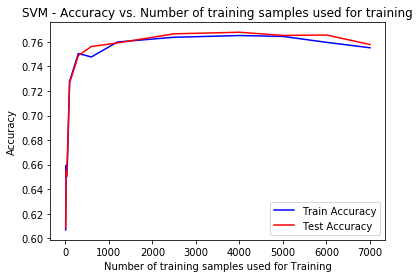

In [21]:
from sklearn.svm import SVC
 
train_results = []
test_results = []
num_train_samples = [10,20,30,50,100,300,600,1200,2500,4000,5000,6000,7000]
svm = SVC(kernel='linear')

for x in num_train_samples:
    svm.fit(X_train[:x],y_train[:x])
    y_pred = svm.predict(X_train)
    train_results.append(accuracy_score(y_train, y_pred))
    
    y_pred = svm.predict(X_test)
    test_results.append(accuracy_score(y_test, y_pred))
    
plt.figure(0)
plt.plot(num_train_samples, train_results, 'b')
plt.plot(num_train_samples, test_results, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Number of training samples used for Training')
plt.title('SVM - Accuracy vs. Number of training samples used for training')
plt.legend(["Train Accuracy","Test Accuracy"])
plt.show()

[0.737825124515772, 0.753458771444383, 0.7542888765910348, 0.7545655783065855, 0.7545655783065855]
[0.7440284054228534, 0.7579083279535184, 0.7562943834732085, 0.7559715945771466, 0.7562943834732085]


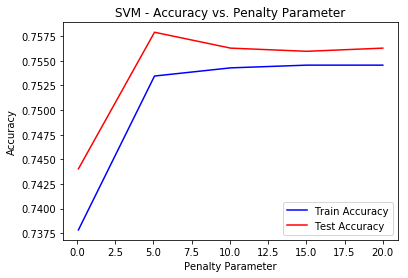

In [28]:
train_results = []
test_results = []
C = np.linspace(.1, 20, 5, endpoint=True)


for c in C:
    svm = SVC(kernel='linear', C=c)
    svm.fit(X_train,y_train)
    y_pred = svm.predict(X_train)
    train_results.append(accuracy_score(y_train, y_pred))
    
    y_pred = svm.predict(X_test)
    test_results.append(accuracy_score(y_test, y_pred))

print(train_results)
print(test_results)
plt.figure(0)
plt.plot(C, train_results, 'b')
plt.plot(C, test_results, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Penalty Parameter')
plt.title('SVM - Accuracy vs. Penalty Parameter')
plt.legend(["Train Accuracy","Test Accuracy"])
plt.show()

#### -  K-NN

In [79]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


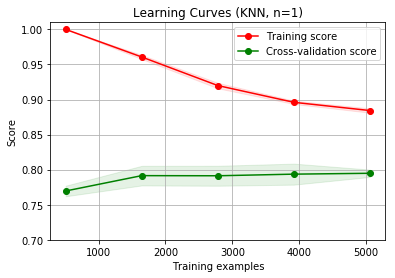

In [92]:

title = "Learning Curves (KNN, n=1)"
svm = SVC(gamma=0.001)
knn = KNeighborsClassifier(n_neighbors=5)
gb = GradientBoostingClassifier(n_estimators=50, max_depth = 6, random_state = 0)
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20,), random_state=1)
dtree = DecisionTreeClassifier(max_depth=5) 
plot_learning_curve(gb, title, X_train, y_train, (0.7,1.01), cv=10, n_jobs=-1)

plt.show()

In [73]:
from sklearn.model_selection import GridSearchCV

In [75]:
# define the parameter values that should be searched
k_range = list(range(1, 61))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True, n_jobs = -1)

# fit the grid with data
grid.fit(X_train, y_train)

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.715378,0.015274,{'n_neighbors': 1}
1,0.751289,0.008583,{'n_neighbors': 2}
2,0.748978,0.017368,{'n_neighbors': 3}
3,0.761422,0.011400,{'n_neighbors': 4}
4,0.758400,0.017330,{'n_neighbors': 5}
5,0.768889,0.010894,{'n_neighbors': 6}
6,0.762311,0.015296,{'n_neighbors': 7}
7,0.769244,0.011230,{'n_neighbors': 8}
8,0.768889,0.013038,{'n_neighbors': 9}
9,0.774756,0.011960,{'n_neighbors': 10}


In [76]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'mean_train_score', 'params']]

,mean_test_score,mean_train_score,params
0,0.715378,0.998242,{'n_neighbors': 1}
1,0.751289,0.861570,{'n_neighbors': 2}
2,0.748978,0.859437,{'n_neighbors': 3}
3,0.761422,0.836207,{'n_neighbors': 4}
4,0.758400,0.833027,{'n_neighbors': 5}
5,0.768889,0.824731,{'n_neighbors': 6}
6,0.762311,0.820207,{'n_neighbors': 7}
7,0.769244,0.815822,{'n_neighbors': 8}
8,0.768889,0.813887,{'n_neighbors': 9}
9,0.774756,0.813215,{'n_neighbors': 10}


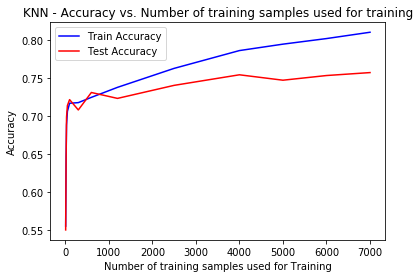

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

train_results = []
test_results = []
num_train_samples = [10,20,30,50,100,300,600,1200,2500,4000,5000,6000,7000]
knn = KNeighborsClassifier(n_neighbors=7)

for x in num_train_samples:
    knn.fit(X_train[:x],y_train[:x])
    y_pred = knn.predict(X_train)
    train_results.append(accuracy_score(y_train, y_pred))
    
    y_pred = knn.predict(X_test)
    test_results.append(accuracy_score(y_test, y_pred))
    
plt.figure(0)
plt.plot(num_train_samples, train_results, 'b')
plt.plot(num_train_samples, test_results, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Number of training samples used for Training')
plt.title('KNN - Accuracy vs. Number of training samples used for training')
plt.legend(["Train Accuracy","Test Accuracy"])
plt.show()

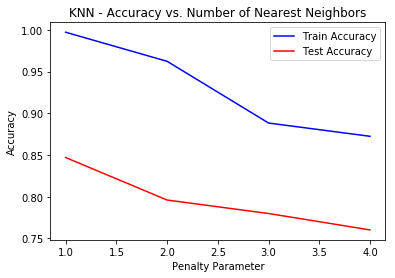

In [18]:
train_results = []
test_results = []
num_neighbors = np.linspace(1, 4, 4, endpoint=True)


for n in num_neighbors:
    knn = KNeighborsClassifier(n_neighbors=int(n))
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    train_results.append(accuracy_score(y_train, y_pred))
    
    y_pred = knn.predict(X_test)
    test_results.append(accuracy_score(y_test, y_pred))
    
plt.figure(0)
plt.plot(num_neighbors, train_results, 'b')
plt.plot(num_neighbors, test_results, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Penalty Parameter')
plt.title('KNN - Accuracy vs. Number of Nearest Neighbors')
plt.legend(["Train Accuracy","Test Accuracy"])
plt.show()